<a href="https://colab.research.google.com/github/Kiroxs/MachineLearning/blob/main/LaboratorioS08/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Laboratorio Decisions Trees Machine Learning



---



---



In [85]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier #tipo de clasificador
from sklearn.tree import plot_tree #visualizar arbol de decision
from sklearn.impute import SimpleImputer


import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

###Descripción del Dataset Titanic
El dataset cuenta con información acerca los los tripulantes de de dicho barco,como su ticket, nombre y la ubicación,ademas nos informa si el pasajero sobrevivió o no, por ende, con estos datos podriamos predecir la supervivencia en el Titanic según la ubicación de su habitación



###Demostración contedio del dataset

In [86]:
df= pd.read_csv('titanic.csv')
df = pd.get_dummies(data=df, drop_first=True)
df.sample(20)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
664,665,1,3,20.0,1,0,7.9250,0,0,0,...,0,0,0,0,0,0,0,0,0,1
37,38,0,3,21.0,0,0,8.0500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
231,232,0,3,29.0,0,0,7.7750,0,0,0,...,0,0,0,0,0,0,0,0,0,1
377,378,0,1,27.0,0,2,211.5000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
269,270,1,1,35.0,0,0,135.6333,0,0,0,...,0,0,0,0,0,0,0,0,0,1
748,749,0,1,19.0,1,0,53.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
641,642,1,1,24.0,0,0,69.3000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
753,754,0,3,23.0,0,0,7.8958,0,0,0,...,0,0,0,0,0,0,0,0,0,1
678,679,0,3,43.0,1,6,46.9000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
867,868,0,1,31.0,0,0,50.4958,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [87]:
X= df.drop(columns='Survived')
X = X.drop(columns='Age')
y= df.Survived

In [146]:
#Import Module
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                    train_size=0.5,
                                                    test_size=0.5,
                                                    random_state=500)
print("Labels for training and testing data")
print(train_y)
print(test_y)

Labels for training and testing data
681    1
95     0
158    0
345    1
819    0
      ..
287    0
718    0
273    0
833    0
858    1
Name: Survived, Length: 445, dtype: int64
275    1
784    0
139    0
419    0
356    1
      ..
263    0
186    1
138    0
384    0
429    1
Name: Survived, Length: 446, dtype: int64


In [147]:
model = DecisionTreeClassifier(max_depth=4)

In [148]:

model.fit(train_X,train_y)

DecisionTreeClassifier(max_depth=4)

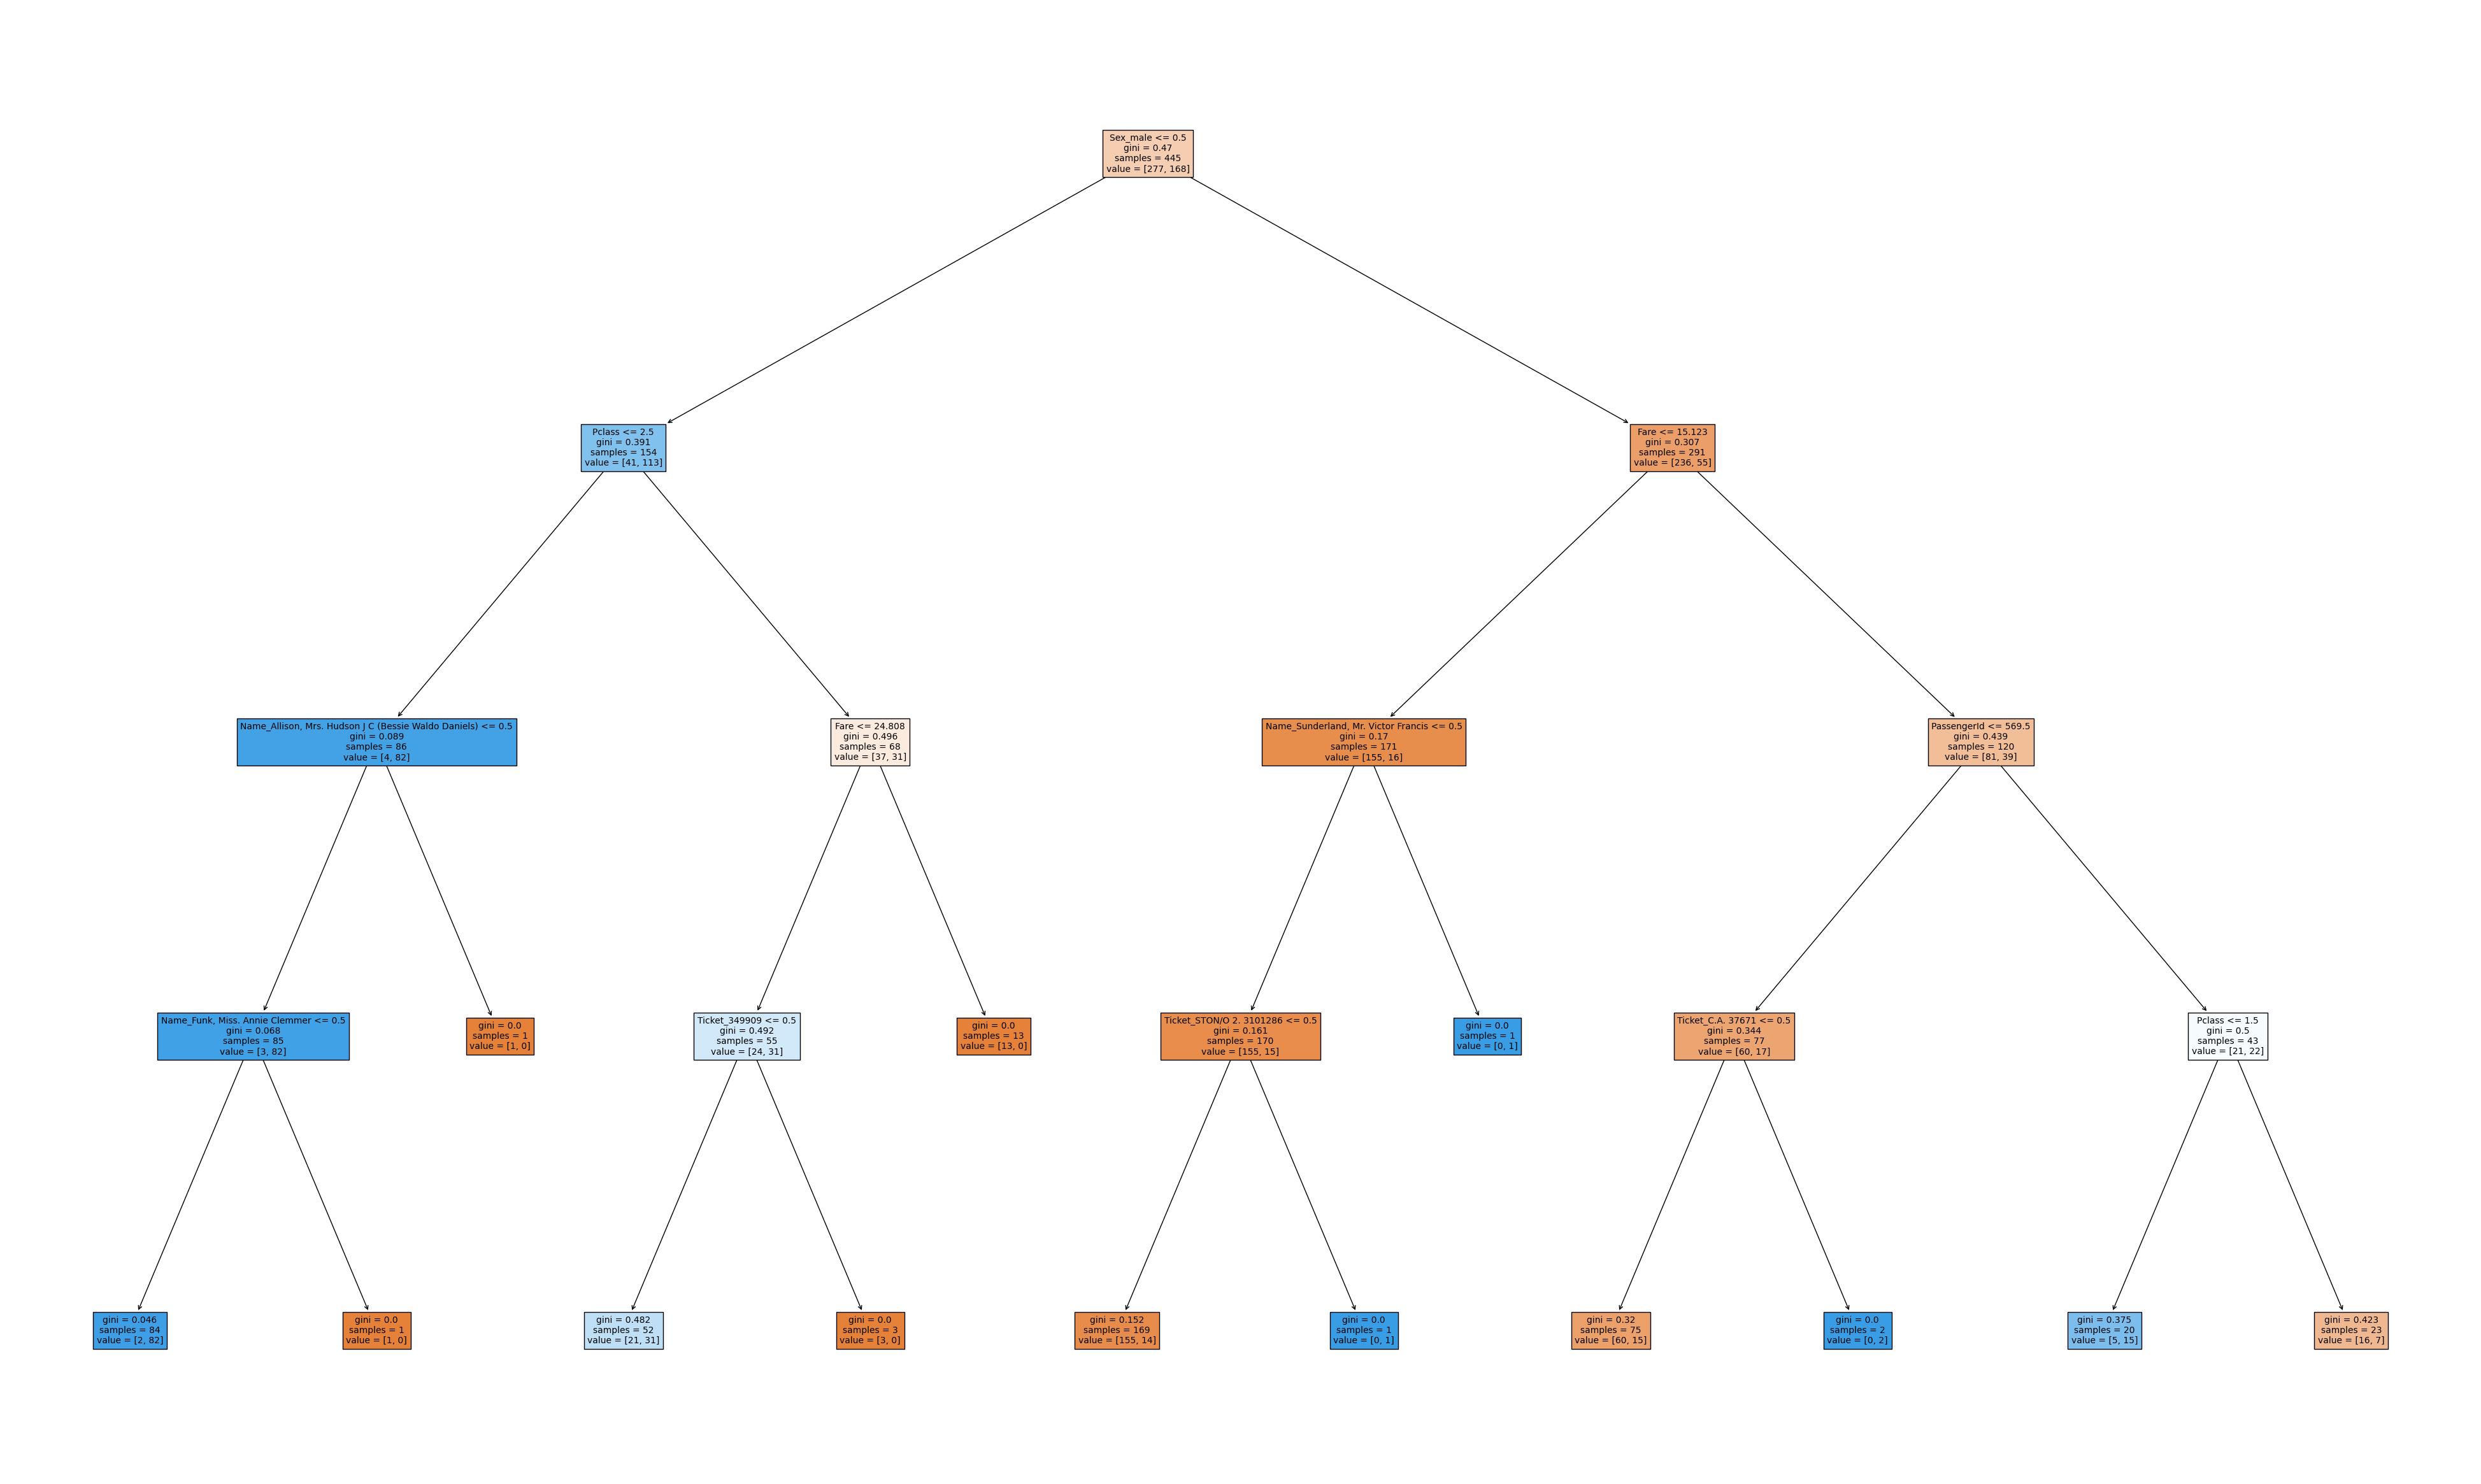

In [149]:
plt.figure(figsize=(50,30))
plot_tree(decision_tree=model, feature_names=X.columns, filled=True, fontsize=10);

In [150]:
y_pred = model.predict(X)

In [151]:
df['pred'] = y_pred
df.sample(10)[['Survived','pred']]

,Survived,pred
187,1,0
486,1,1
615,1,1
588,0,0
628,0,0
594,0,0
786,1,1
573,1,1
546,1,1
281,0,0


In [152]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[477,  72],
       [ 83, 259]])

In [153]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)


0.8260381593714927

In [154]:
from sklearn.metrics import f1_score
f1 = f1_score(y, y_pred)
print("F1 Score:", f1)

F1 Score: 0.7696879643387815
